In [2]:
# load MM_M_C_F_B_S161_001.json
import json

In [4]:
data = json.load(open('MM_M_C_F_B_S161_001.json', 'r', encoding='cp949'))
data.keys()

dict_keys(['Info', 'Motion', 'Transcript'])

In [67]:
data['Transcript'].keys()

dict_keys(['Sentences', 'Speaker_Info', 'Transcript_Info'])

In [70]:
data['Transcript']['Sentences'][0]


{'emotion': 'neutral',
 'end_time': 10.11,
 'sentence_text': '오늘 시험공부든 요즘 시험공부 땜에 스트레스받아요.',
 'speaker_ID': 'S161',
 'start_time': 6.95}

In [13]:
data['Info'].keys()

dict_keys(['Audio_Info', 'Dataset', 'Video_Info'])

In [17]:
data['Info']['Video_Info'].keys()

dict_keys(['FPS', 'extrinsic', 'intrinsic', 'resolution', 'video_duration', 'video_format', 'video_name'])

In [19]:
data['Info']['Video_Info']['video_duration']

241.24

In [5]:
data['Motion'].keys()

dict_keys(['Keypoints', 'Keypoints_Info'])

In [21]:
data['Motion']['Keypoints_Info'].keys()

dict_keys(['body', 'face'])

In [22]:
data['Motion']['Keypoints_Info']['body']

['Hip',
 'Ab',
 'Chest',
 'Neck',
 'Head',
 'LShoulder',
 'LUArm',
 'LFArm',
 'LHand',
 'RShoulder',
 'RUArm',
 'RFArm',
 'RHand',
 'LThigh',
 'LShin',
 'LFoot',
 'RThigh',
 'RShin',
 'RFoot',
 'LToe',
 'RToe']

In [24]:
len(data['Motion']['Keypoints_Info']['body'])

21

In [23]:
data['Motion']['Keypoints_Info']['face']

['RTemple',
 'RJawAngle',
 'Chin',
 'LJawAngle',
 'LTemple',
 'RBrowOuter',
 'RBrowMiddle',
 'RBrowInner',
 'LBrowInner',
 'LBrowMiddle',
 'LBrowOuter',
 'NoseTip',
 'RNoseAlar',
 'LNoseAlar',
 'REyeOuterCorner',
 'RUpperEyelidCenter',
 'REyeInnerCorner',
 'RLowerEyelidCenter',
 'LEyeInnerCorner',
 'LUpperEyelidCenter',
 'LEyeOuterCorner',
 'LLowerEyelidCenter',
 'RCheek',
 'LCheek',
 'MouthRCorner',
 'MouthUpperCenter',
 'MouthLCorner',
 'MouthLowerCenter']

In [6]:
data['Motion']['Keypoints'].keys()

dict_keys(['keypoints_2d', 'keypoints_3d'])

In [8]:
data['Motion']['Keypoints']['keypoints_3d'][0].keys()

dict_keys(['body', 'face', 'speaker_ID'])

In [12]:
len(data['Motion']['Keypoints']['keypoints_3d'][0]['body'])

7230

In [16]:
len(data['Motion']['Keypoints']['keypoints_3d'][0]['body'])/30

241.0

In [27]:
data['Motion']['Keypoints']['keypoints_3d'][0]['body'][0]

[[11.1, 889.0, -119.4],
 [11.8, 964.6, -118.4],
 [15.7, 1133.9, -138.9],
 [6.2, 1341.3, -119.9],
 [-1.0, 1485.1, -125.0],
 [45.4, 1287.3, -125.9],
 [215.9, 1286.3, -123.4],
 [207.7, 1057.6, -119.4],
 [231.7, 845.4, -46.5],
 [-28.3, 1284.0, -127.0],
 [-198.7, 1281.6, -124.0],
 [-189.4, 1054.0, -101.9],
 [-208.1, 842.2, -19.3],
 [103.2, 888.0, -116.6],
 [121.3, 463.1, -98.1],
 [129.5, 105.9, -135.5],
 [-81.1, 889.9, -122.2],
 [-106.0, 466.3, -155.4],
 [-91.4, 107.5, -167.1],
 [137.1, 50.3, 4.4],
 [-121.4, 50.1, -31.0]]

In [29]:
len(data['Motion']['Keypoints']['keypoints_3d'][0]['body'][0])

21

In [74]:
joint_label = ['Hip',
 'Ab',
 'Chest',
 'Neck',
 'Head',
 'LShoulder',
 'LUArm',
 'LFArm',
 'LHand',
 'RShoulder',
 'RUArm',
 'RFArm',
 'RHand',
 'LThigh',
 'LShin',
 'LFoot',
 'RThigh',
 'RShin',
 'RFoot',
 'LToe',
 'RToe']
# make limb list
limb_list = [
    [0, 1], # Hip - Ab
    [1, 2], # Ab - Chest
    [2, 3], # Chest - Neck
    [3, 4], # Neck - Head
    [2, 5], # Chest - LShoulder
    [5, 6], # LShoulder - LUArm
    [6, 7], # LUArm - LFArm
    [7, 8], # LFArm - LHand
    [2, 9], # Chest - RShoulder
    [9, 10], # RShoulder - RUArm
    [10, 11], # RUArm - RFArm
    [11, 12], # RFArm - RHand
    [0, 13], # Hip - LThigh
    [13, 14], # LThigh - LShin
    [14, 15], # LShin - LFoot
    [0, 16], # Hip - RThigh
    [16, 17], # RThigh - RShin
    [17, 18], # RShin - RFoot
    [15, 19], # LFoot - LToe
    [18, 20], # RFoot - RToe
]

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# normalize -0.5 ~ 0.5
body = np.array(data['Motion']['Keypoints']['keypoints_3d'][0]['body'])
body = body.reshape(-1, 3)
body = body - np.mean(body, axis=0)
body = body / np.max(np.abs(body), axis=0)
body = body.reshape(-1, 21, 3)


In [53]:
body[0]

array([[-0.03178555,  0.03394013, -0.0202554 ],
       [-0.03075366,  0.12668559, -0.01741504],
       [-0.02500452,  0.33438144, -0.07564231],
       [-0.03900884,  0.58881806, -0.02167557],
       [-0.04962264,  0.76523072, -0.03616138],
       [ 0.01877741,  0.52257131, -0.0387177 ],
       [ 0.2701181 ,  0.52134451, -0.03161681],
       [ 0.25803016,  0.24077723, -0.0202554 ],
       [ 0.29340949, -0.01954799,  0.18680646],
       [-0.08986663,  0.51852289, -0.04184209],
       [-0.3410599 ,  0.51557859, -0.03332103],
       [-0.32735041,  0.23636078,  0.02945081],
       [-0.35491681, -0.02347373,  0.26406411],
       [ 0.10398264,  0.03271334, -0.0123024 ],
       [ 0.13066455, -0.4885505 ,  0.04024416],
       [ 0.14275249, -0.92676053, -0.06598511],
       [-0.16770116,  0.03504424, -0.02820839],
       [-0.20440722, -0.48462476, -0.12250816],
       [-0.18288479, -0.92479766, -0.15574031],
       [ 0.15395595, -0.99497015,  0.33138051],
       [-0.22710896, -0.99521551,  0.230

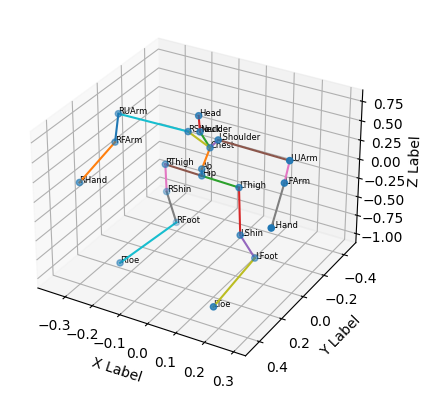

In [78]:
# plot 3d xzy
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# draw joints
ax.scatter(body[0][:, 0], body[0][:, 2], body[0][:, 1])
# draw limbs
for limb in limb_list:
    ax.plot(body[0][limb, 0], body[0][limb, 2], body[0][limb, 1])
# draw text on joints
for i, joint in enumerate(body[0]):
    ax.text(joint[0], joint[2], joint[1], joint_label[i], size=6, zorder=1, color='k')
# set axis
ax.set_ylim3d(0.5, -0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [82]:
def show_3d_body(body, limb_list, frame_idx, joint_label=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # draw joints
    ax.scatter(body[frame_idx][:, 0], body[frame_idx][:, 2], body[frame_idx][:, 1])
    # draw limbs
    for limb in limb_list:
        ax.plot(body[frame_idx][limb, 0], body[frame_idx][limb, 2], body[frame_idx][limb, 1])
    if joint_label is not None:
        for i, joint in enumerate(body[frame_idx]):
            ax.text(joint[0], joint[2], joint[1], joint_label[i], size=6, zorder=1, color='k')
    ax.set_ylim3d(0.5, -0.5)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

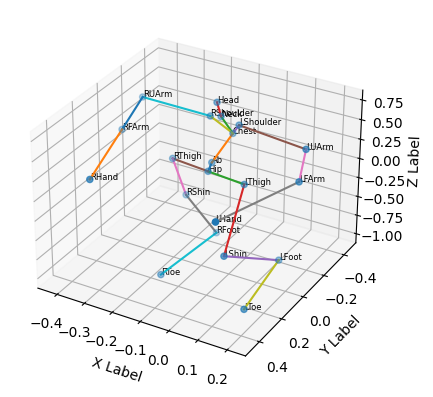

In [83]:
show_3d_body(body, limb_list, 6500, joint_label)

In [134]:
# ko font
import matplotlib.font_manager as fm
font_path = '/home/tiger/.fonts/GeekbleMalang2TTF.ttf'
fontprop = fm.FontProperties(fname=font_path)

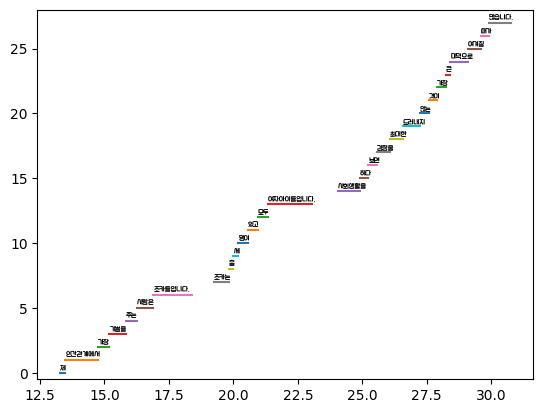

In [147]:
text_data = [['제', 13.27, 13.483333333333333], ['인간관계에서', 13.483333333333333, 14.763333333333334], 
             ['가장', 14.763333333333334, 15.19], ['기쁨을', 15.19, 15.83], 
             ['주는', 15.83, 16.256666666666668], ['사람은', 16.256666666666668, 16.89666666666667], 
             ['조카들입니다.', 16.89666666666667, 18.39], 
             ['조카는', 19.24, 19.81], ['총', 19.81, 20.0], ['세', 20.0, 20.189999999999998], 
             ['명이', 20.189999999999998, 20.57], ['있고', 20.57, 20.95], ['모두', 20.95, 21.33], 
             ['여자아이들입니다.', 21.33, 23.04], 
             ['사회생활을', 24.06, 24.8975], ['하다', 24.8975, 25.232499999999998], 
             ['보면', 25.232499999999998, 25.5675], ['감정을', 25.5675, 26.07], 
             ['최대한', 26.07, 26.572499999999998], ['드러내지', 26.572499999999998, 27.2425],
               ['않는', 27.2425, 27.5775], ['것이', 27.5775, 27.9125], 
               ['가장', 27.9125, 28.247500000000002], ['큰', 28.247500000000002, 28.415], 
               ['미덕으로', 28.415, 29.085], ['여겨질', 29.085, 29.5875], 
               ['때가', 29.5875, 29.9225], ['많습니다.', 29.9225, 30.76]]
# plot text data on time axis
fig = plt.figure()
ax = fig.add_subplot(111)
for idx, text in enumerate(text_data):
    ax.plot([text[1], text[2]], [idx, idx], label=text[0])
    ax.text(text[1], idx+0.3, text[0], size=5, zorder=1, color='k', fontproperties=fontprop)
ax.set_ylim(-0.5, len(text_data))
plt.show()

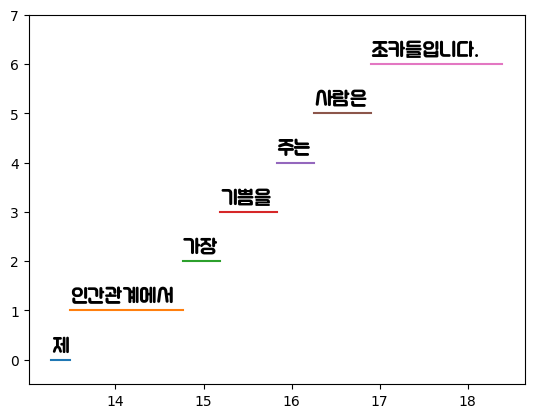

In [142]:
text_data = [
    ['제', 13.27, 13.483333333333333], ['인간관계에서', 13.483333333333333, 14.763333333333334], 
    ['가장', 14.763333333333334, 15.19], ['기쁨을', 15.19, 15.83], 
    ['주는', 15.83, 16.256666666666668], ['사람은', 16.256666666666668, 16.89666666666667], 
    ['조카들입니다.', 16.89666666666667, 18.39], 
]
# plot text data on time axis
fig = plt.figure()
ax = fig.add_subplot(111)
for idx, text in enumerate(text_data):
    ax.plot([text[1], text[2]], [idx, idx], label=text[0])
    ax.text(text[1], idx+0.2, text[0], size=15, zorder=1, color='k', fontproperties=fontprop)
ax.set_ylim(-0.5, len(text_data))
plt.show()

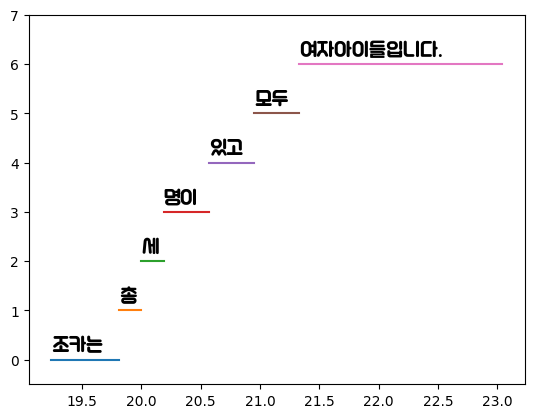

In [143]:
text_data = [
    ['조카는', 19.24, 19.81], ['총', 19.81, 20.0], ['세', 20.0, 20.189999999999998], 
    ['명이', 20.189999999999998, 20.57], ['있고', 20.57, 20.95], ['모두', 20.95, 21.33], 
    ['여자아이들입니다.', 21.33, 23.04], 
]
# plot text data on time axis
fig = plt.figure()
ax = fig.add_subplot(111)
for idx, text in enumerate(text_data):
    ax.plot([text[1], text[2]], [idx, idx], label=text[0])
    ax.text(text[1], idx+0.2, text[0], size=15, zorder=1, color='k', fontproperties=fontprop)
ax.set_ylim(-0.5, len(text_data))
plt.show()

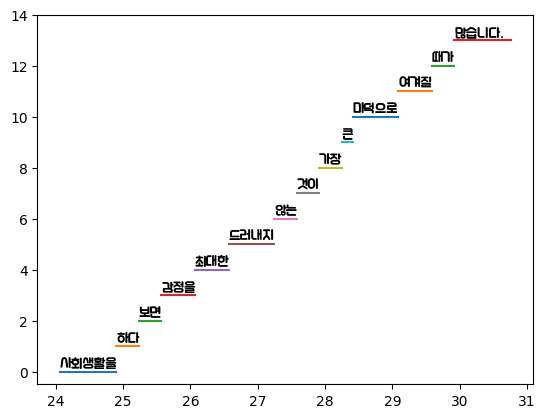

In [146]:
text_data = [['사회생활을', 24.06, 24.8975], ['하다', 24.8975, 25.232499999999998], 
    ['보면', 25.232499999999998, 25.5675], ['감정을', 25.5675, 26.07], 
    ['최대한', 26.07, 26.572499999999998], ['드러내지', 26.572499999999998, 27.2425],
    ['않는', 27.2425, 27.5775], ['것이', 27.5775, 27.9125], 
    ['가장', 27.9125, 28.247500000000002], ['큰', 28.247500000000002, 28.415], 
    ['미덕으로', 28.415, 29.085], ['여겨질', 29.085, 29.5875], 
    ['때가', 29.5875, 29.9225], ['많습니다.', 29.9225, 30.76]
]
# plot text data on time axis
fig = plt.figure()
ax = fig.add_subplot(111)
for idx, text in enumerate(text_data):
    ax.plot([text[1], text[2]], [idx, idx], label=text[0])
    ax.text(text[1], idx+0.2, text[0], size=10, zorder=1, color='k', fontproperties=fontprop)
ax.set_ylim(-0.5, len(text_data))
plt.show()

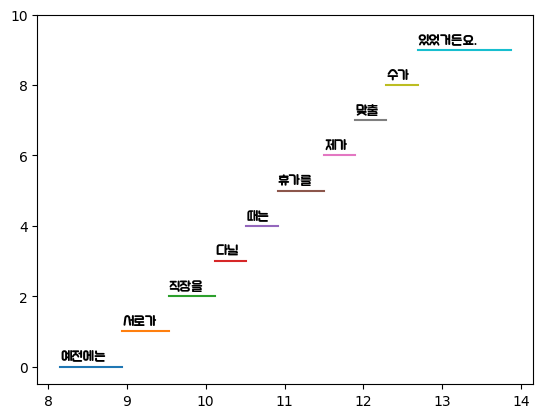

In [149]:
text_data = [
    ['예전에는', 8.15, 8.93896551724138], ['서로가', 8.93896551724138, 9.530689655172413], 
    ['직장을', 9.530689655172413, 10.122413793103448], ['다닐', 10.122413793103448, 10.516896551724138], 
    ['때는', 10.516896551724138, 10.911379310344827], ['휴가를', 10.911379310344827, 11.503103448275862], 
    ['제가', 11.503103448275862, 11.897586206896552], ['맞출', 11.897586206896552, 12.292068965517242], 
['수가', 12.292068965517242, 12.686551724137932], ['있었거든요.', 12.686551724137932, 13.87]]
# plot text data on time axis
fig = plt.figure()
ax = fig.add_subplot(111)
for idx, text in enumerate(text_data):
    ax.plot([text[1], text[2]], [idx, idx], label=text[0])
    ax.text(text[1], idx+0.2, text[0], size=10, zorder=1, color='k', fontproperties=fontprop)
ax.set_ylim(-0.5, len(text_data))
plt.show()

(-0.5, 26.0)

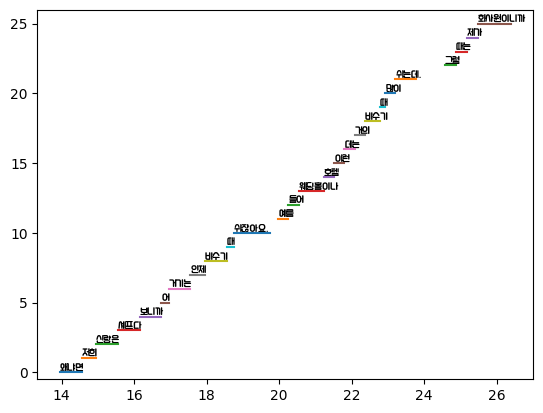

In [156]:
text_data = [
['왜냐면', 13.95, 14.549999999999999], ['저희', 14.549999999999999, 14.95], 
['신랑은', 14.95, 15.549999999999999], ['셰프다', 15.549999999999999, 16.15], 
['보니까', 16.15, 16.75], ['어', 16.75, 16.95], ['거기는', 16.95, 17.55], 
['인제', 17.55, 17.95], ['비수기', 17.95, 18.55], ['때', 18.55, 18.75], 
['쉬잖아요.', 18.75, 19.75], 
['예를', 19.97, 20.25148148148148], ['들어', 20.25148148148148, 20.532962962962962], 
['웨딩홀이나', 20.532962962962962, 21.236666666666665], ['호텔', 21.236666666666665, 21.518148148148146], 
['이런', 21.518148148148146, 21.799629629629628], ['데는', 21.799629629629628, 22.08111111111111], 
['거의', 22.08111111111111, 22.36259259259259], ['비수기', 22.36259259259259, 22.784814814814816], 
['때', 22.784814814814816, 22.925555555555555], ['많이', 22.925555555555555, 23.207037037037036], 
['쉬는데.', 23.207037037037036, 23.77], ['그럴', 24.58, 24.88139534883721], 
['때는', 24.88139534883721, 25.182790697674417], ['제가', 25.182790697674417, 25.484186046511628], 
['회사원이니까', 25.484186046511628, 26.388372093023253]]

fig = plt.figure()
ax = fig.add_subplot(111)
for idx, text in enumerate(text_data):
    ax.plot([text[1], text[2]], [idx, idx], label=text[0])
    ax.text(text[1], idx+0.2, text[0], size=7, zorder=1, color='k', fontproperties=fontprop)
ax.set_ylim(-0.5, len(text_data))

(-0.5, 32.0)

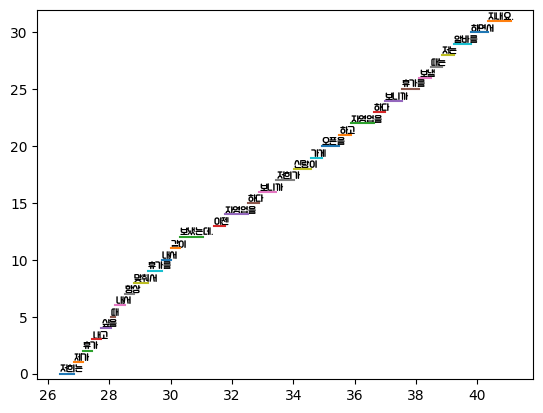

In [158]:

text_data = [['저희는', 26.388372093023253, 26.84046511627907], ['제가', 26.84046511627907, 27.141860465116277], 
['휴가', 27.141860465116277, 27.44325581395349], ['내고', 27.44325581395349, 27.744651162790696], 
['싶을', 27.744651162790696, 28.046046511627907], ['때', 28.046046511627907, 28.19674418604651], 
['내서', 28.19674418604651, 28.49813953488372], ['항상', 28.49813953488372, 28.79953488372093], 
['맞춰서', 28.79953488372093, 29.251627906976744], ['휴가를', 29.251627906976744, 29.703720930232556],
 ['내서', 29.703720930232556, 30.005116279069767], ['같이', 30.005116279069767, 30.306511627906975], 
 ['보냈는데.', 30.306511627906975, 31.06], 
 ['이젠', 31.4, 31.77296296296296], ['자영업을', 31.77296296296296, 32.51888888888889], 
 ['하다', 32.51888888888889, 32.891851851851854], ['보니까', 32.891851851851854, 33.45129629629629], 
 ['저희가', 33.45129629629629, 34.01074074074074], ['신랑이', 34.01074074074074, 34.57018518518518], 
 ['가게', 34.57018518518518, 34.94314814814815], ['오픈을', 34.94314814814815, 35.50259259259259], 
 ['하고', 35.50259259259259, 35.87555555555555], ['자영업을', 35.87555555555555, 36.62148148148148], 
 ['하다', 36.62148148148148, 36.99444444444444], ['보니까', 36.99444444444444, 37.55388888888889],
   ['휴가를', 37.55388888888889, 38.11333333333333], ['보낼', 38.11333333333333, 38.486296296296295],
     ['때는', 38.486296296296295, 38.85925925925926], ['저는', 38.85925925925926, 39.23222222222222], 
     ['알바를', 39.23222222222222, 39.791666666666664], ['하면서', 39.791666666666664, 40.35111111111111],
       ['지내요.', 40.35111111111111, 41.09703703703703]]


fig = plt.figure()
ax = fig.add_subplot(111)
for idx, text in enumerate(text_data):
    ax.plot([text[1], text[2]], [idx, idx], label=text[0])
    ax.text(text[1], idx+0.2, text[0], size=7, zorder=1, color='k', fontproperties=fontprop)
ax.set_ylim(-0.5, len(text_data))